# Apprentissage supervisé - Régression Multiple

Nous avons vu précédemment la régression linéaire simple, via les modèles `LinearRegression` et `HuberRegression`, toutefois si nos tests ont très bien fonctionné, il est rare que nos régressions soient simples dans le monde réel, les problèmes sont plus complexes et donc impliquent plus de variables (features).

Etant donné que nous sommes toujours dans le cas d'une régression nos données doivent toujours être **numériques quantitatives**.

![Image regression](../_images/regression.jpg)
Notre but est toujours de trouver la courbe passant par le plus de points, mais cette fois-ci avec plusieurs features (entrées).

## Régression linéaire multiple

Beaucoup plus utilisée donc, la régression linéaire multiple consiste à trouver la droite répondant à l'équation suivante :
$$ y = a_1x_1 + a_2x_2 + … + a_nx_n + b $$
A partir de notre jeu de données qui ressemble à quelque chose comme ceci
![Image regression](../_images/dataframe-linear-multiple.jpg)

Pour les outils, on ne change pas par rapport à tout à la régression linéaire simple, on va donc utiliser :
- numpy
- pandas
- matplotlib.pyplot
- scikit-learn
(voir les précédentes pratiques si vous avez oublié à quoi ils servent)

Quant au dataset, nous allons changer de fichier, mais rester dans le même thème. Cette fois nous allons essayer de trouver la valeur d'un crédit immobilier accordé à une personne en fonction de critières définis.

# Avant-propos - Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.

```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Phase 1 : Chargement des données

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

credit_df_src = pd.read_csv("credit-immo.csv")
credit_df = credit_df_src.copy()
display(credit_df)

age  credit-rating  children         loan
0      19         27.900         0  16884.92400
1      18         42.130         1   1725.55230
2      28         33.000         3   4449.46200
3      33         22.705         0  21984.47061
4      32         28.880         0   3866.85520
...   ...            ...       ...          ...
1333   50         30.970         3  10600.54830
1334   18         31.920         0   2205.98080
1335   18         36.850         0   1629.83350
1336   21         25.800         0   2007.94500
1337   61         29.070         0  29141.36030

[1338 rows x 4 columns]

On remarque donc que notre jeu de données est composé de quatre colonnes. Notre régression sera donc multiple, nous cherchonsà trouver la valeur de la colonne "loan" (crédit en français). Notre équation sera donc de la forme suivante :
$$ loan = a_1(age) + a_2(creditrating) + a3(children) + b $$
scikit-learn va nous aider à trouver les valeurs de "a1-3" et "b". 

On remarque également que nos clés sont en anglais, nous allons donc les renommer en français dans la phase 2 : exploration des données

# Phase 2 : Exploration des données

On essaye de se poser des questions pour mieux connaître notre jeu de données :
- Est-ce qu'il y a des données manquantes ? `df.isnull().sum()`
- Est-ce que le format de données est correct ? `df.dtypes`
- Quels sont les données statistiques que nous pouvons sortir de notre dataset ? `df.describe()`


## A vous de coder

Mais avant on renomme nos colonnes grâce à pandas.
- [Documentation de la méthode `rename` de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [3]:
# Premiere étape renommage des colonnes
# - age -> age
# - credit-rating -> note-de-credit
# - children -> nombre-d-enfants
# - loan -> credit-immobilier

credit_df.rename(
    columns={"credit-rating": "note-de-credit", "children": "nombre-d-enfants", "loan": "credit-immo"}, 
    inplace=True
)

# Est-ce qu'il y a des données manquantes ?

# Est-ce que le format de données est correct ?

# Quels sont les données statistiques que nous pouvons sortir de notre dataset ? 

Vu que nous savons maintenant faire des graphiques, nous allons essayer de modéliser tout ça. Vu que nous sommes dans un cas avec plusieurs colonnes, nous allons de voir changer de graphiques, pas de nuage de points ici mais un nuage de points 3D, nous pouvons donc afficher 3 colonnes, et pour la dernière nous allons jouer sur des nuances de couleurs pour gérer la quatrième colonne

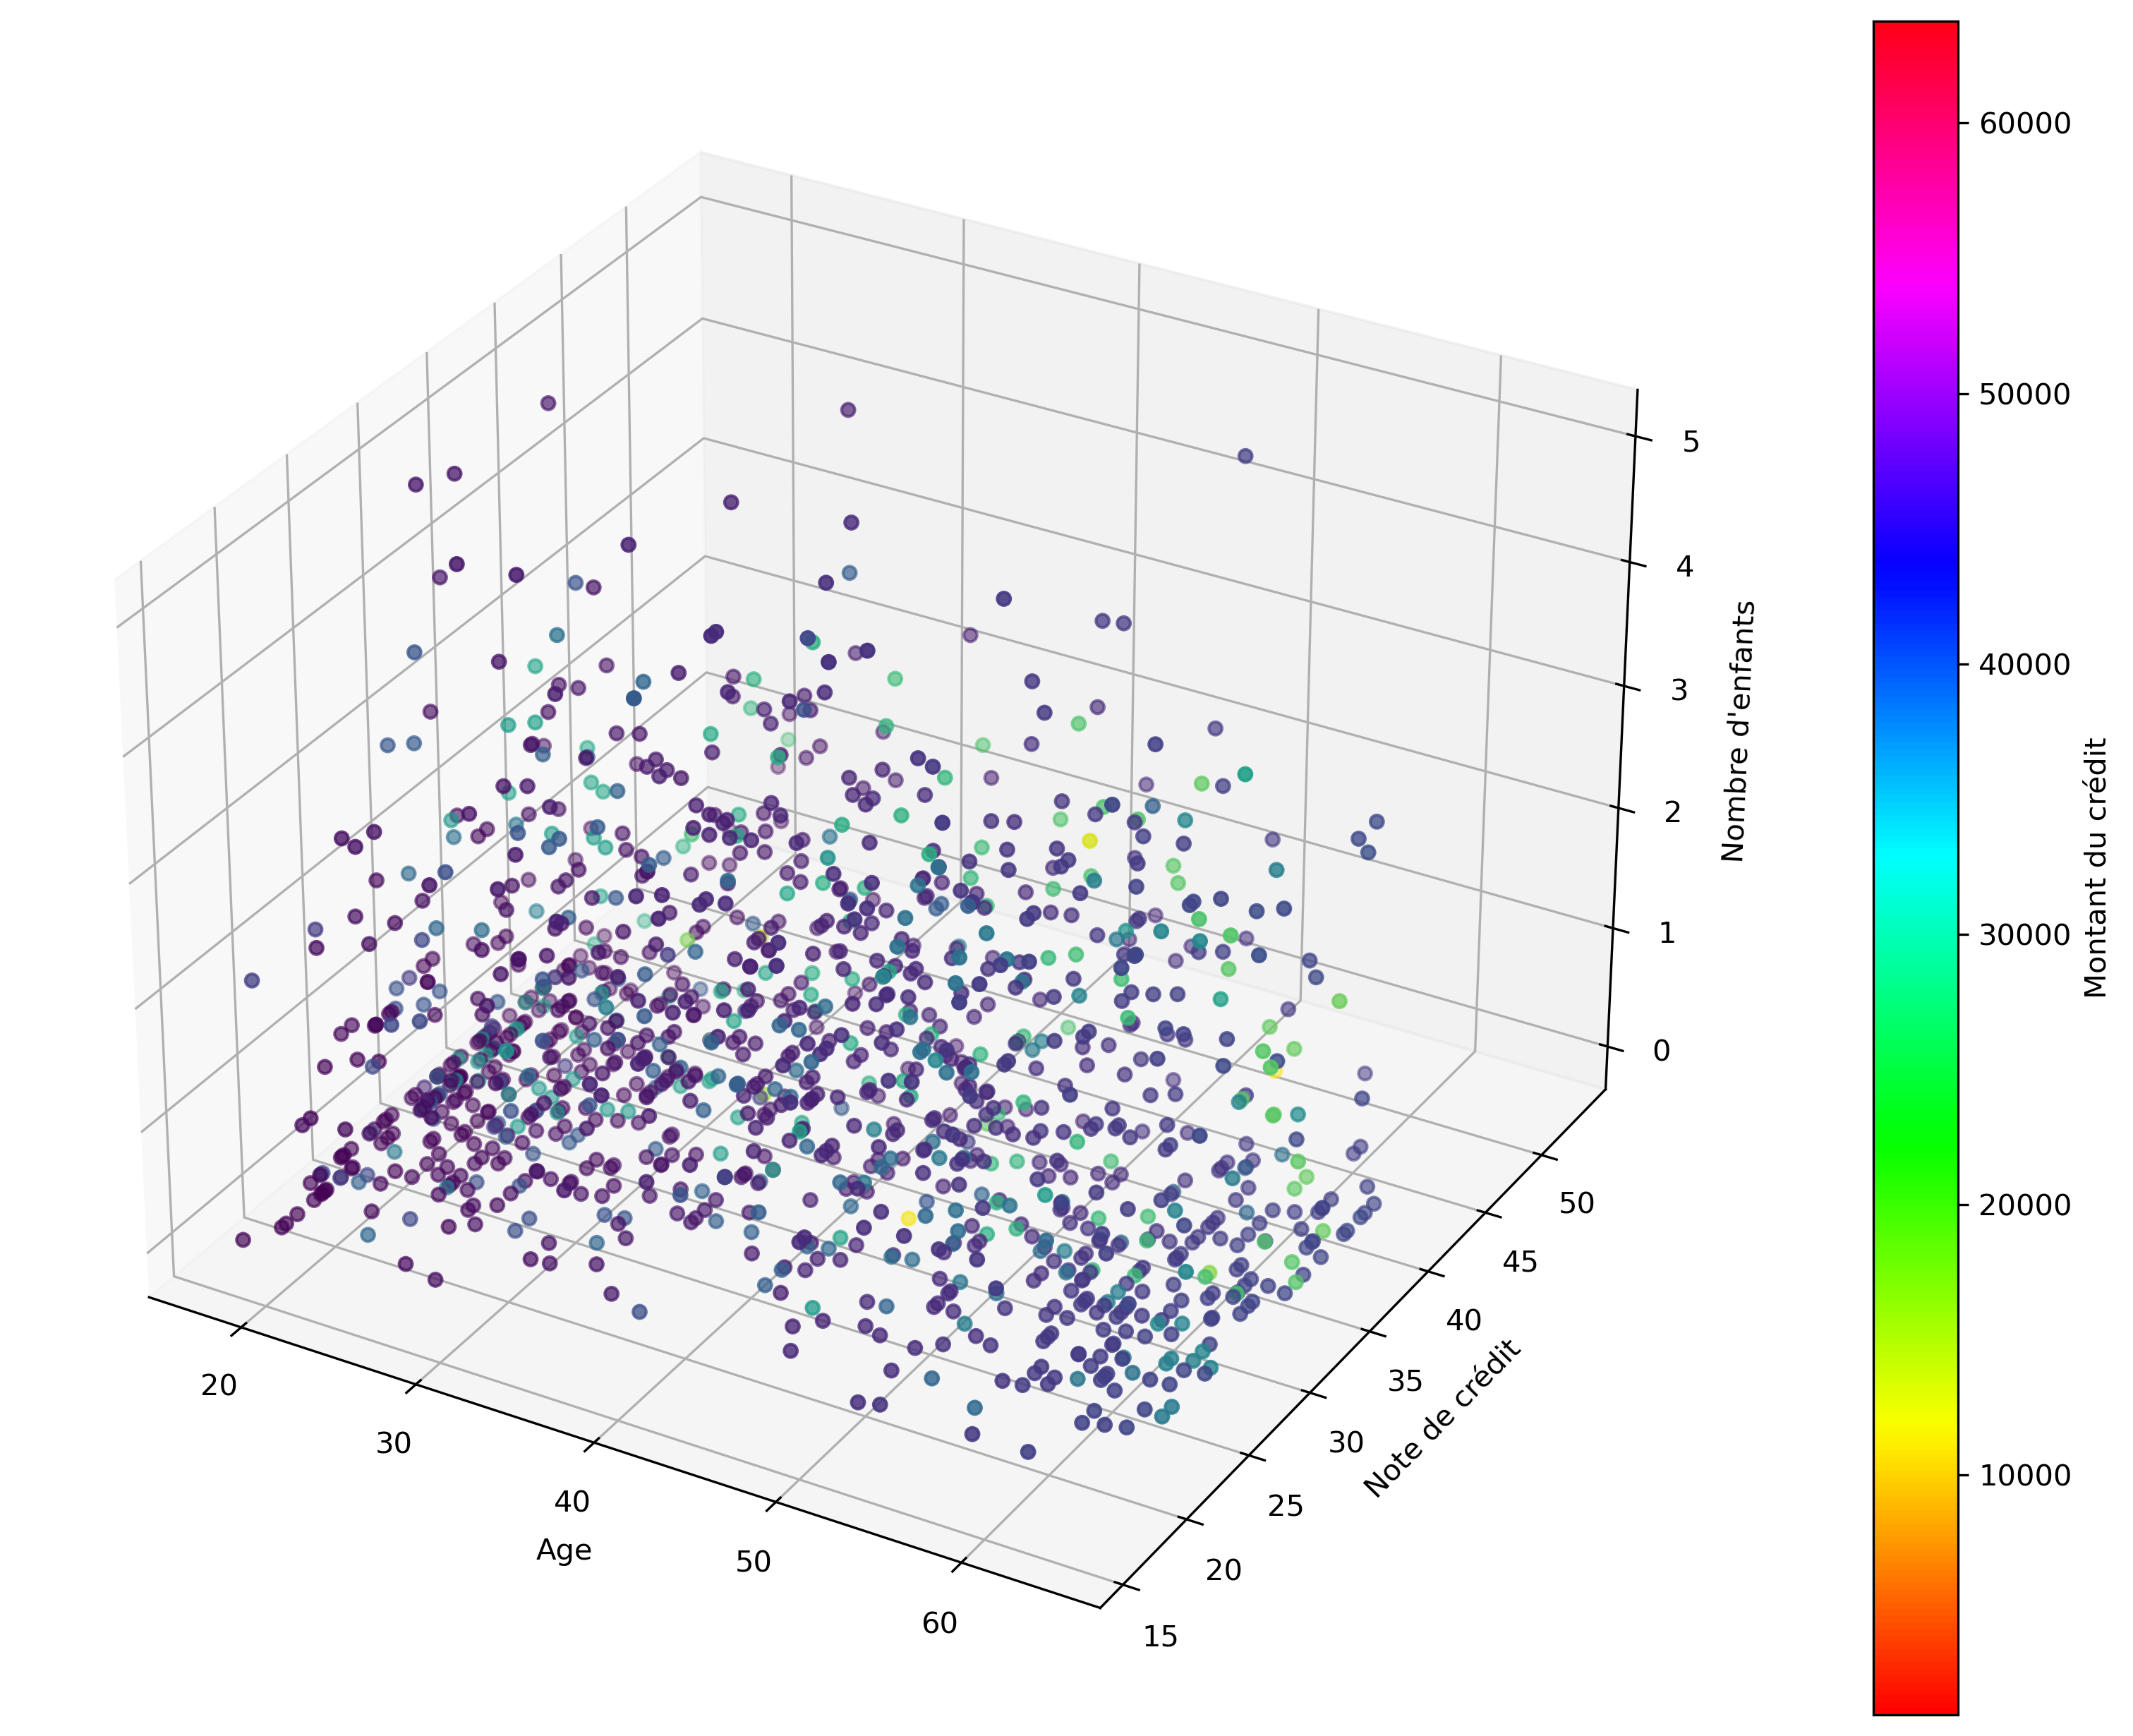

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"] # z"
)

# Phase 3 : Nettoyage / Formattage

On a vu que certaines colonnes avaient des formats inadaptés nous allons donc y remédier et encore une fois nous avons des valeurs aberrantes. Et qui dit valeurs aberrantes dit IQR.

- Calculez l'IQR
- Supprimez les valeurs aberrantes basses et hautes pour chaque feature (toutes les colonnes sauf "credit-immo")

# A vous de coder

Calcul de l'IQR
```python
Q1 = df['nom_de_colonne'].quantile(0.25) # Premier quartile
Q3 = df['nom_de_colonne'].quantile(0.75) # Troisième quartile
IQR = Q3 - Q1 # On calcule IQR
```

1338

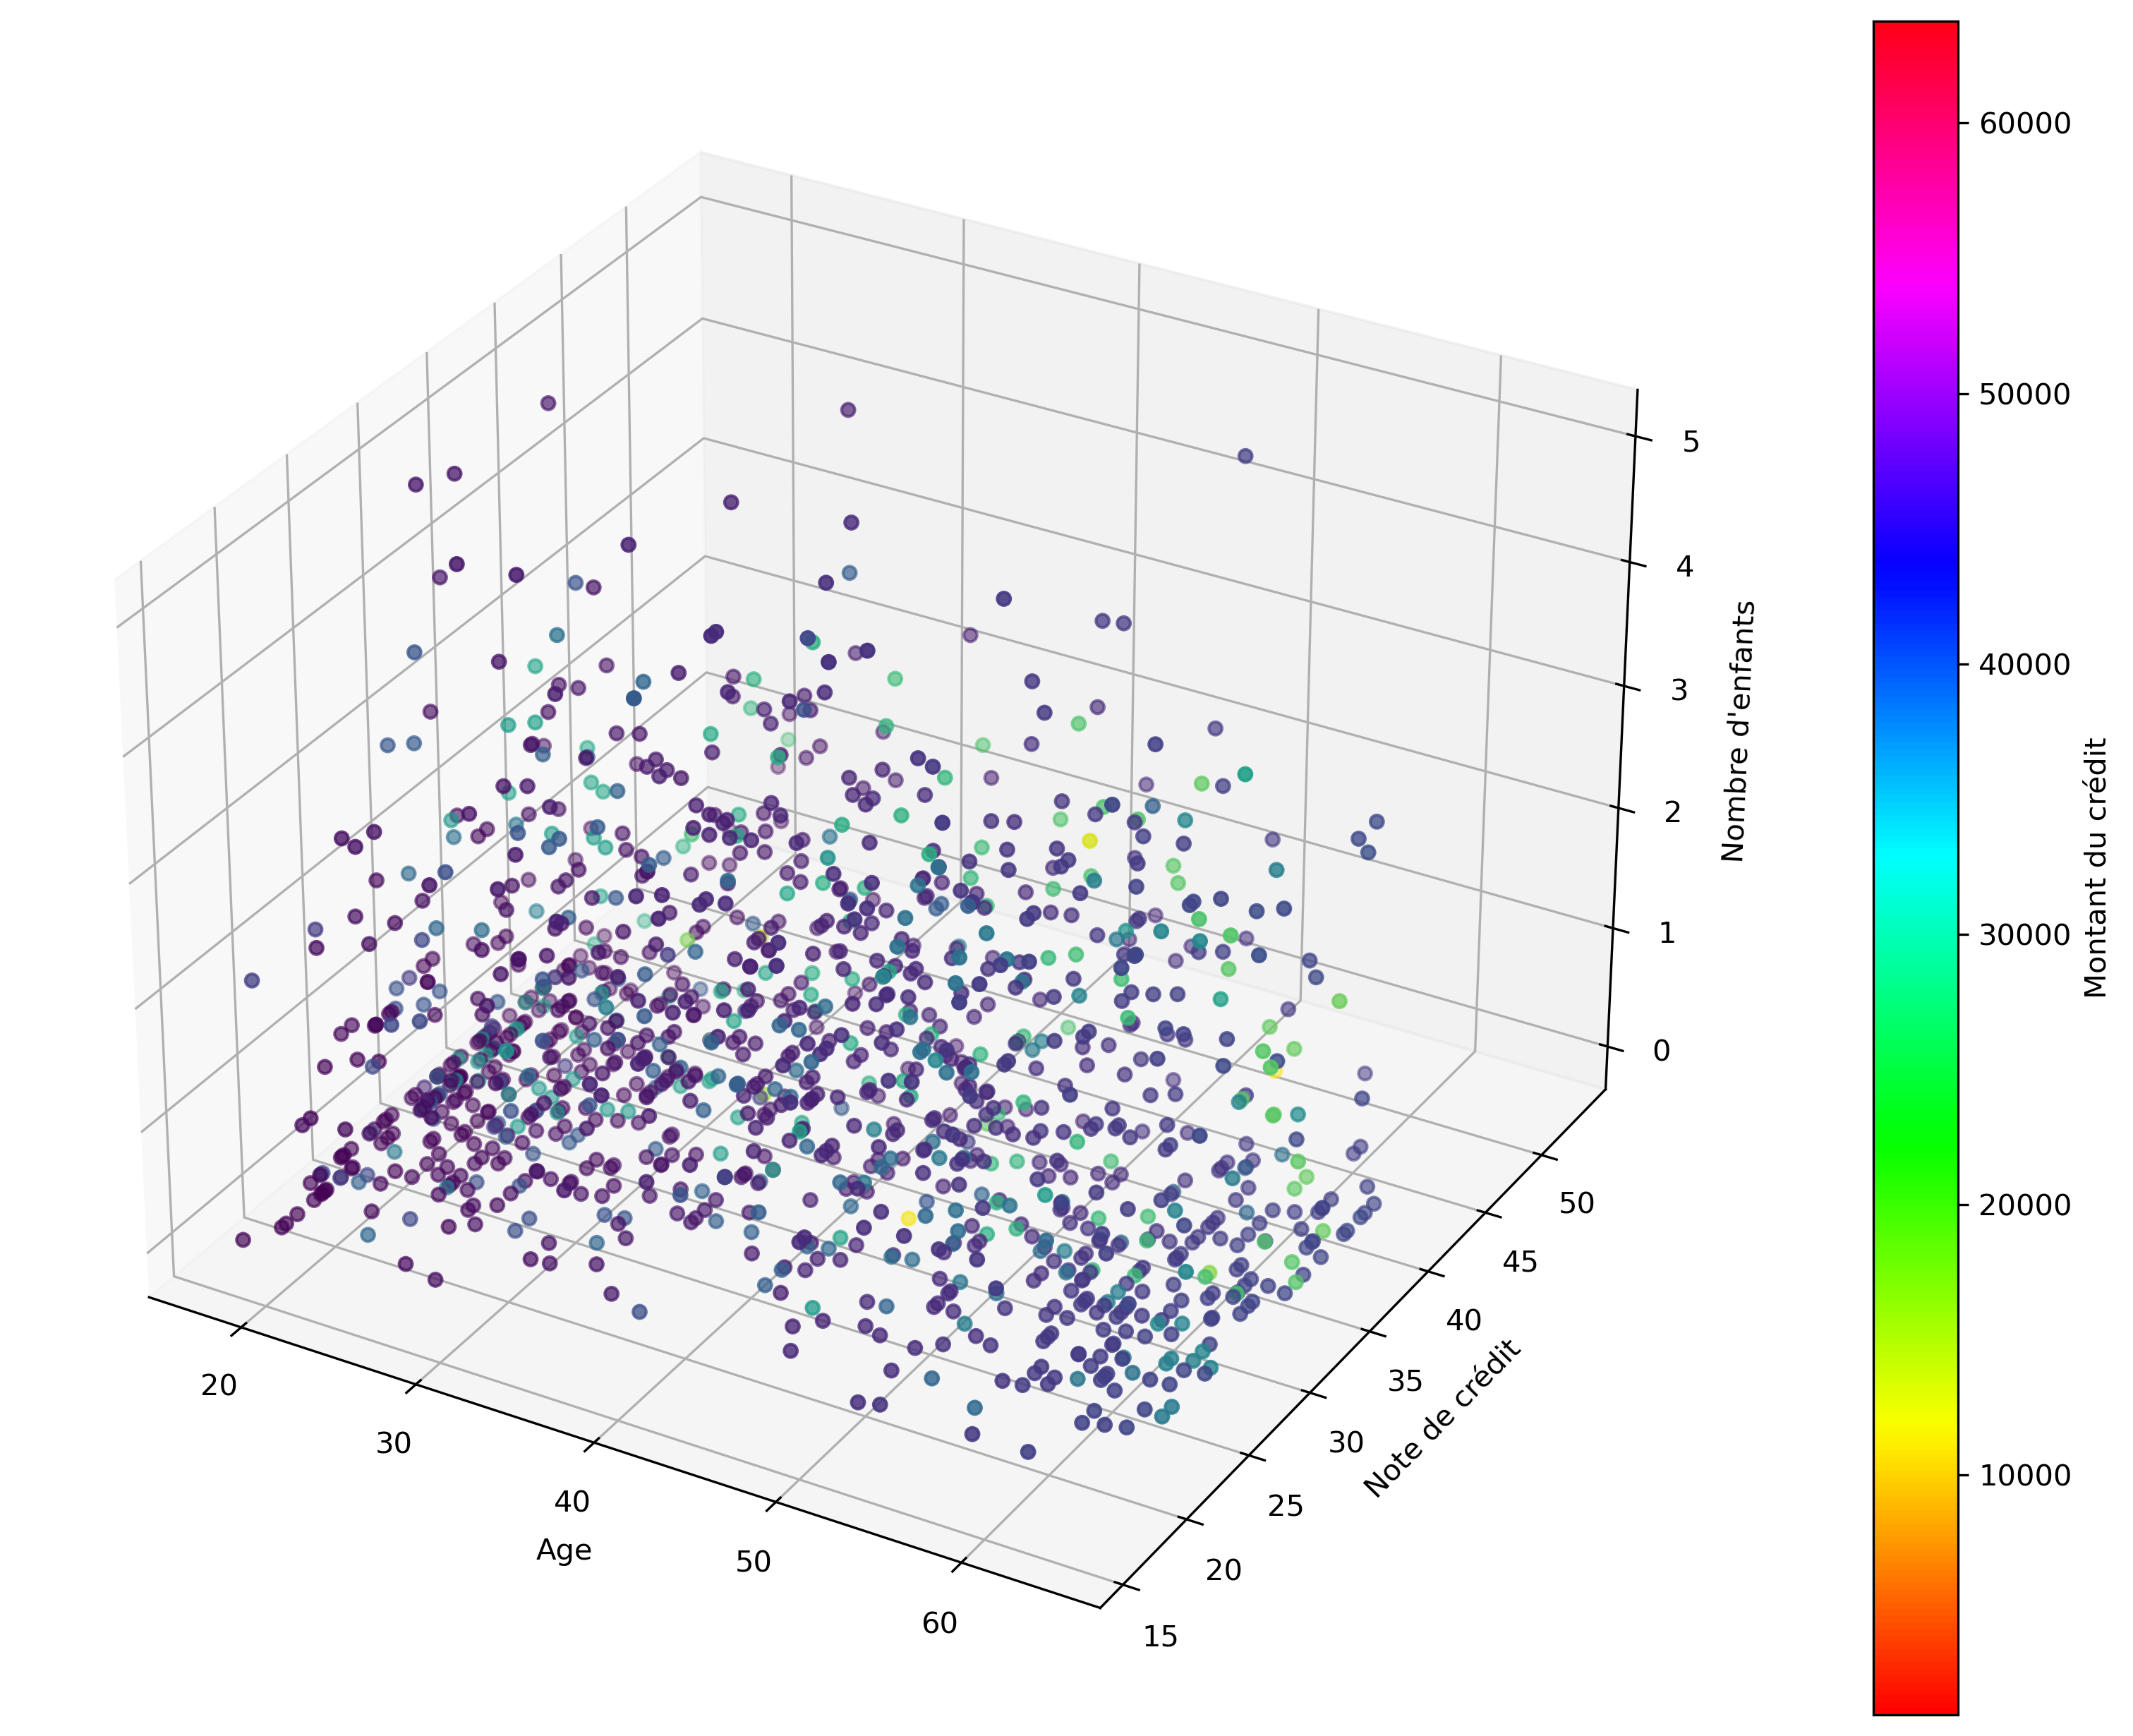

In [5]:
# Supprimez les valeurs aberrantes basses et hautes pour chaque feature (toutes les colonnes sauf "credit-immo")
# Travaillez avec la variable tmp_credit_df

liste_colonnes = ['age', 'note-de-credit', 'nombre-d-enfants']

tmp_credit_df = credit_df.copy()
# for col in liste_colonnes:
#     Q1 = tmp_credit_df[col].quantile(0.25) # Premier quartile
#     Q3 = tmp_credit_df[col].quantile(0.75) # Troisième quartile
#     IQR = Q3 - Q1 # On calcule IQR
# 
#     tmp_credit_df.query(f'(@Q1 - 1.5 * @IQR) <= `{col}` <= (@Q3 + 1.5 * @IQR)', inplace=True)

Q1_1 = tmp_credit_df['age'].quantile(0.25) # Premier quartile
Q3_1 = tmp_credit_df['age'].quantile(0.75) # Troisième quartile
IQR_1 = Q3_1 - Q1_1 # On calcule IQR

tmp_credit_df.query(f'(@Q1_1 - 5 * @IQR_1) <= `age` <= (@Q3_1 + 5 * @IQR_1)', inplace=True)

Q1_2 = tmp_credit_df['note-de-credit'].quantile(0.25) # Premier quartile
Q3_2 = tmp_credit_df['note-de-credit'].quantile(0.75) # Troisième quartile
IQR_2 = Q3_2 - Q1_2 # On calcule IQR

tmp_credit_df.query(f'(@Q1_2 - 5 * @IQR_2) <= `note-de-credit` <= (@Q3_2 + 5 * @IQR_2)', inplace=True)

Q1_3 = tmp_credit_df['nombre-d-enfants'].quantile(0.25) # Premier quartile
Q3_3 = tmp_credit_df['nombre-d-enfants'].quantile(0.75) # Troisième quartile
IQR_3 = Q3_3 - Q1_3 # On calcule IQR

tmp_credit_df.query(f'(@Q1_3 - 5 * @IQR_3) <= `nombre-d-enfants` <= (@Q3_3 + 5 * @IQR_3)', inplace=True)

display(len(tmp_credit_df))
# Maintenant nous allons modifier les colonnes aux valeurs incorrectes
# Arrondir à deux décimales les colonnes "note-de-credit" et "credit-immo"


# Et on réaffiche notre graphique

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"]
)

Que constatez-vous ?

# Phase 4 : Modélisation

Nous allons utiliser scikit-learn et la régression linéaire via la ligne de code suivante `from sklearn.linear_model import LinearRegression, HuberRegressor`.
Nous allons donc tester deux modèles en même temps, et nous allons également utiliser la fonction `train_test_split` pour valider notre modèle et comparer avec les prédictions.

In [6]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split

liste_entrees = credit_df[["note-de-credit", "nombre-d-enfants", "age"]] # 
sortie = credit_df['credit-immo']

taux_donnees_test = 0.2
X_entrainement, X_test, y_entrainement, y_test = train_test_split(
    liste_entrees, 
    sortie,
    random_state=1, # On veut limiter l'aléatoire du split, ça sera plus simple pour comparer les données
    shuffle=False,
    test_size=taux_donnees_test)

In [7]:
reg_lineaire = LinearRegression()
reg_lineaire.fit(X_entrainement, y_entrainement)

reg_lineaire_pred = reg_lineaire.predict(X_test)

# On stocke le score de notre modèle pour comparer sa performance face à un autre modèle
score_reg_lin = round(reg_lineaire.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_lin}%")

liste_predictions = pd.DataFrame({'Cible': y_test, 'Predicted (linear)': reg_lineaire_pred})
#liste_predictions.sort_values('Cible', inplace=True)
display(liste_predictions)

'Score de notre modèle: 12.78%'

Cible  Predicted (linear)
1070  39871.70430        14486.300167
1071  13974.45555        18855.246991
1072   1909.52745         8148.233818
1073  12096.65120        16718.190801
1074  13204.28565        14013.598362
...           ...                 ...
1333  10600.54830        16826.267794
1334   2205.98080         7594.683534
1335   1629.83350         9129.371363
1336   2007.94500         6450.115743
1337  29141.36030        17608.878405

[268 rows x 2 columns]

Que constatez-vous ?

In [8]:
reg_huber = HuberRegressor()
reg_huber.fit(X_entrainement, y_entrainement)

display(f"Le coefficient directeur est {reg_huber.coef_}") # a de ax + b
display(f"L'ordonnée à l'origine est {reg_huber.intercept_}") # b de ax +b 

score_reg_huber = round(reg_huber.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_huber}%")

reg_huber_pred = reg_huber.predict(X_test)

liste_predictions['Predicted (huber)'] = reg_huber_pred
display(liste_predictions)

'Le coefficient directeur est [ -4.21374099 446.65911652 268.88801304]'

"L'ordonnée à l'origine est -3406.4496919898543"

'Score de notre modèle: -11.69%'

Cible  Predicted (linear)  Predicted (huber)
1070  39871.70430        14486.300167        6832.862528
1071  13974.45555        18855.246991       13400.994044
1072   1909.52745         8148.233818        2108.498107
1073  12096.65120        16718.190801       11885.128405
1074  13204.28565        14013.598362       12649.572149
...           ...                 ...                ...
1333  10600.54830        16826.267794       11247.428751
1334   2205.98080         7594.683534        1299.031930
1335   1629.83350         9129.371363        1278.258187
1336   2007.94500         6450.115743        2131.484064
1337  29141.36030        17608.878405       12873.225653

[268 rows x 3 columns]

Que constatez-vous ?

Il semblerait que nous utilisions pas le bon modèle car ni HuberRegressor, ni LinearRegression semblent nous donner de bons résultats, nous allons donc devoir utiliser un autre modèle. Nous allons utiliser la version regressive de la forêt d'arbres qui est cette fois-ci régressive.

In [9]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_entrainement, y_entrainement)

score_regr = round(regr.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_regr}%")

regr_pred = regr.predict(X_test)

liste_predictions['Predicted (foret regr)'] = regr_pred

display(liste_predictions.tail(50))

'Score de notre modèle: 83.86%'

Cible  Predicted (linear)  Predicted (huber)  \
1288  38344.56600        11373.319775        2698.607407   
1289   7147.47280        15404.881474        8726.666407   
1290   7133.90250         9881.989867        7620.548904   
1291  34828.65400         8775.865380        1555.362995   
1292   1515.34490         5643.859866        2142.397653   
1293   9301.89355        14185.665161       10193.893495   
1294  11931.12525        15635.819704       12082.974135   
1295   1964.78000         5485.222958        2325.267383   
1296   1708.92575         5790.724920        1323.450559   
1297   4340.44090         9388.883270        4904.026632   
1298   5261.46945        10950.660925        6244.484712   
1299   2710.82855         6397.504733        2040.598910   
1300  62592.87309        13954.119584        8565.581718   
1301  46718.16325        19838.942413       14474.485213   
1302   3208.78700         6379.271324        3674.763938   
1303  37829.72420        12650.161292        8038.592869   
1304  21259.37795        12345.153947        8676.485992   
1305   2464.61880         7808.365426        2930.057721   
1306  16115.30450         7248.662847        4299.232445   
1307  21472.47880        11847.255004        6866.112795   
1308  33900.65300         8833.899419        3188.495656   
1309   6875.96100        14455.924189        8375.594616   
1310   6940.90985        12405.918065        8222.621378   
1311   4571.41305         9770.973111        5354.368923   
1312   4536.25900        15540.592203        6001.632379   
1313  36397.57600         9656.709316        2449.523976   
1314  18765.87545         9478.726855        5900.492006   
1315  11272.33139         6942.457575        1760.902652   
1316   1731.67700         4324.336789        1615.619491   
1317   1163.46270        14197.265451        1209.658484   
1318  19496.71917        16215.734161        7623.939576   
1319   7201.70085        12116.907676        7862.616455   
1320   5425.02335        12038.948676        6138.156198   
1321  28101.33305        17123.071747       13152.121301   
1322  12981.34570        20900.645135       13100.987554   
1323  43896.37630        17252.730747        8610.056365   
1324   4239.89265         9498.898628        5266.454456   
1325  13143.33665        18998.813731       12854.411299   
1326   7050.02130        13974.909877        7748.341189   
1327   9377.90470        15844.067395       10626.959447   
1328  22395.74424         7409.969370        3569.214965   
1329  10325.20600        19236.943774       11306.394817   
1330  12629.16560        16501.284213       12705.023591   
1331  10795.93733         9323.004392        2637.235659   
1332  11411.68500        21607.399118       11727.350113   
1333  10600.54830        16826.267794       11247.428751   
1334   2205.98080         7594.683534        1299.031930   
1335   1629.83350         9129.371363        1278.258187   
1336   2007.94500         6450.115743        2131.484064   
1337  29141.36030        17608.878405       12873.225653   

      Predicted (foret regr)  
1288             4845.610821  
1289            15518.797342  
1290             8864.249442  
1291            16437.276926  
1292             5130.940141  
1293            11698.931483  
1294            12092.228907  
1295             8681.786574  
1296             3451.146981  
1297             7569.379177  
1298            12188.398725  
1299             4692.777407  
1300            19816.061353  
1301            30212.973089  
1302             6241.995933  
1303            11839.306662  
1304            14562.647329  
1305            13258.276762  
1306            10988.797607  
1307            13836.476754  
1308            10909.276111  
1309             8484.886034  
1310            10660.014797  
1311            11596.827708  
1312             9769.066517  
1313            14186.917540  
1314            11522.485384  
1315             9054.568894  
1316             1615.953409  
1317            25315

In [10]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_entrainement, y_entrainement)

score_clf = round(clf.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_clf}%")

clf_pred = clf.predict(X_test)

liste_predictions['Predicted (ridge)'] = clf_pred

display(liste_predictions)

'Score de notre modèle: 12.78%'

Cible  Predicted (linear)  Predicted (huber)  \
1070  39871.70430        14486.300167        6832.862528   
1071  13974.45555        18855.246991       13400.994044   
1072   1909.52745         8148.233818        2108.498107   
1073  12096.65120        16718.190801       11885.128405   
1074  13204.28565        14013.598362       12649.572149   
...           ...                 ...                ...   
1333  10600.54830        16826.267794       11247.428751   
1334   2205.98080         7594.683534        1299.031930   
1335   1629.83350         9129.371363        1278.258187   
1336   2007.94500         6450.115743        2131.484064   
1337  29141.36030        17608.878405       12873.225653   

      Predicted (foret regr)  Predicted (ridge)  
1070            23981.740970       14486.283350  
1071            19347.787153       18855.574414  
1072             4073.130961        8148.564751  
1073            12114.359712       16717.916249  
1074            14728.345810       14014.010263  
...                      ...                ...  
1333            15825.560905       16825.670539  
1334            23314.925893        7595.010354  
1335            29059.855266        9129.666477  
1336             2477.727104        6450.481760  
1337            16263.828281       17609.221211  

[268 rows x 5 columns]

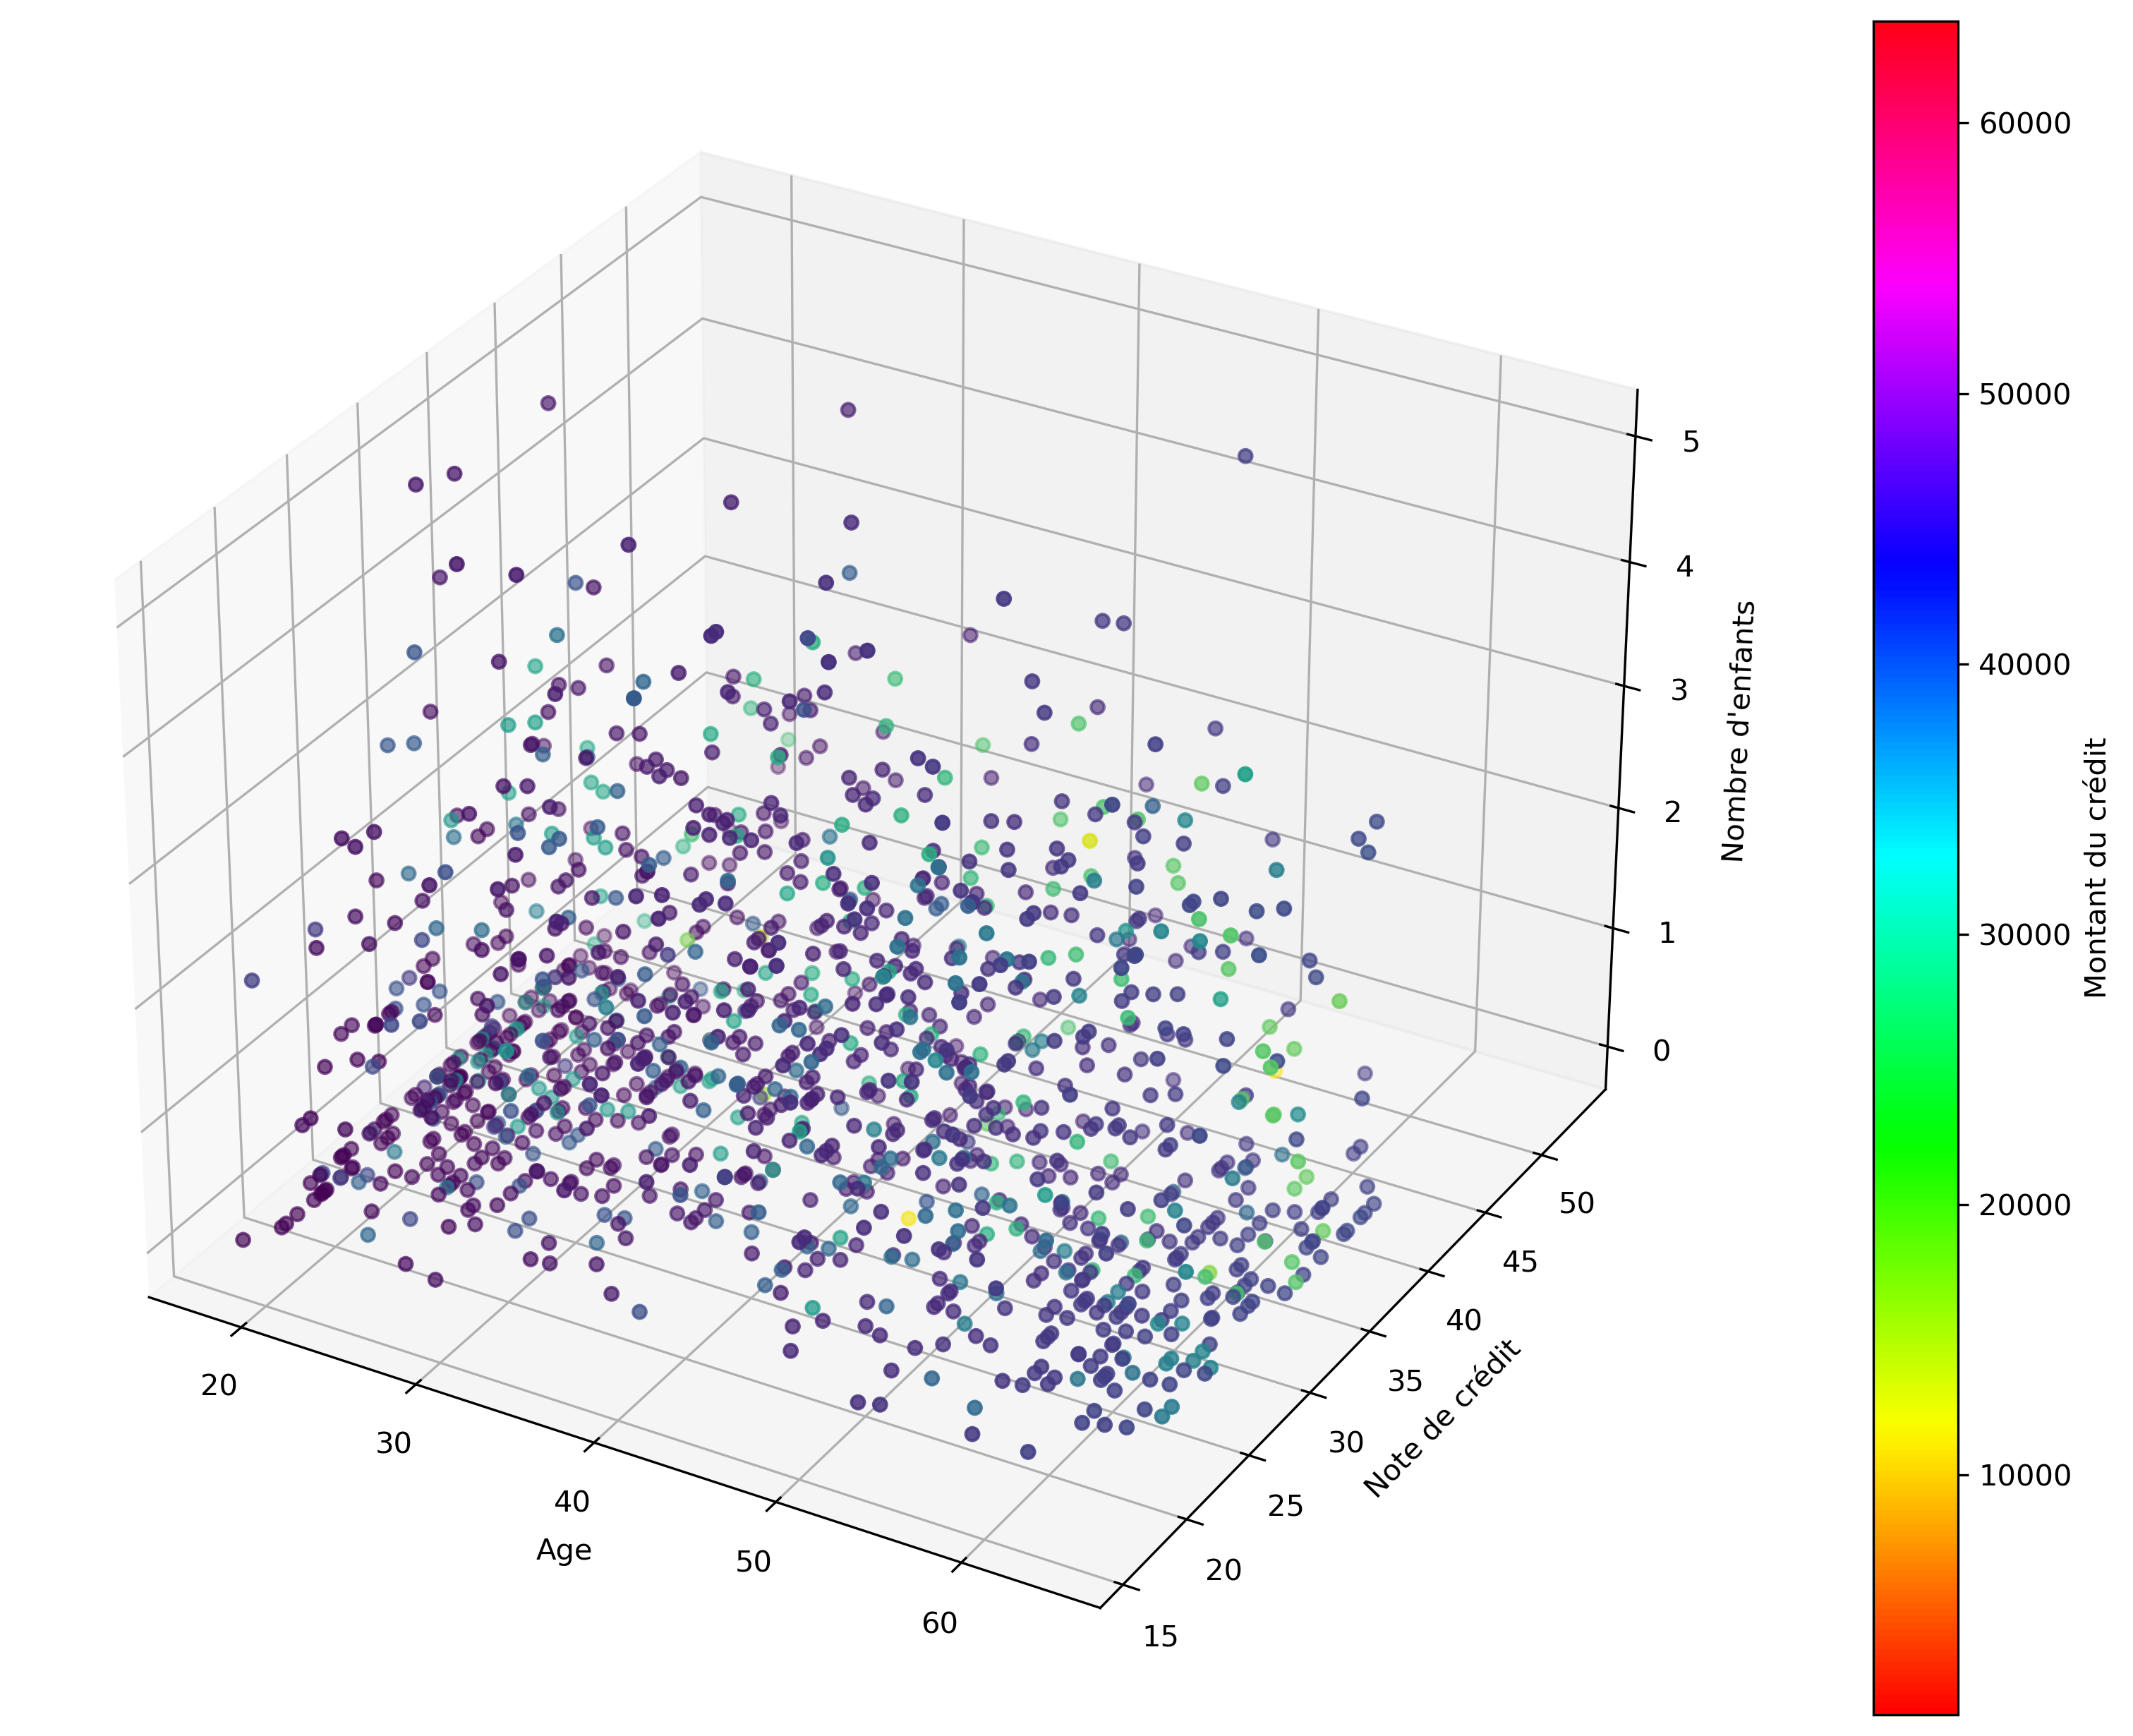

In [215]:
fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"]
)
